In [1]:
import pandas as pd
import seaborn as sns

One of the first things we can do is drop the id collumn as we already have the entries indexed using index_col=0

In [2]:
df_train = pd.read_csv("./data/train.csv", index_col=0)

In [3]:
df_train.head(5)

,carat,cut,color,clarity,depth,table,x,y,z,price
id,,,,,,,,,,
0,0.30,Very Good,F,VS2,62.8,56.0,4.29,4.31,2.70,605
1,0.34,Ideal,E,SI1,62.6,55.0,4.46,4.49,2.80,565
2,0.40,Very Good,D,SI1,60.3,62.0,4.70,4.75,2.85,720
3,0.40,Premium,H,VS1,61.8,59.2,4.72,4.74,2.92,793
4,0.90,Very Good,D,SI1,61.0,63.0,6.10,6.13,3.73,4381


- Carat: weight of the diamond
- Cut: quality of the cut (Fair, Good, Very Good, Premium, Ideal)
- Color: diamond colour, from J (worst) to D (best)
- Clarity: is an assessment of small imperfections on the surface and within the stone (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))
- Depth: The depth of diamond is its height (in millimeters) measured from the culet (bottom tip) to the table (flat, top surface). There are normally two measurements of diamond depth. The first measurement is the actual depth of diamond in millimeters. The second is the diamond depth percentage, indicating the diamond depth in relation to its width. The value given to us 
- Table: refers to the flat facet of the diamond which can be seen when the stone is face up
- x: length in mm
- y: width in mm
- z: depth in mm
- Price: in USD

In [4]:
df_test = pd.read_csv("./data/predict.csv", index_col=0)

In [40]:
df_test.head(5)

,carat,cut,color,clarity,depth,table,x,y,z
id,,,,,,,,,
0,2.36,4,2,2,60.8,54.0,8.68,8.57,5.24
1,2.04,4,3,2,62.0,56.0,8.18,8.23,5.09
2,0.51,4,2,3,61.7,54.0,5.18,5.19,3.20
3,0.30,4,2,3,61.3,56.0,4.32,4.33,2.65
4,0.96,1,3,4,68.8,56.0,6.11,5.98,4.16


In [6]:
train_copy = df_train.copy()

In [7]:
test_copy = df_test.copy()

In [8]:
df_train.isna().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

There are no NaN values so no need to add or drop values

In [9]:
df_train.dtypes

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
x          float64
y          float64
z          float64
price        int64
dtype: object

Right off the bat we can see that there are 11 columns, 3 of which possess values different from numeric values, therefore they must be changed to numerical types. We will see what type of data is available in those columns

In [10]:
df_train.cut.value_counts()

Ideal        16175
Premium      10272
Very Good     9146
Good          3676
Fair          1186
Name: cut, dtype: int64

In [11]:
df_train.color.value_counts()

G    8469
E    7375
F    7179
H    6229
D    5012
I    4088
J    2103
Name: color, dtype: int64

In [12]:
df_train.clarity.value_counts()

SI1     9813
VS2     9217
SI2     6844
VS1     6150
VVS2    3784
VVS1    2780
IF      1326
I1       541
Name: clarity, dtype: int64

In [13]:
df_train.head(5)

,carat,cut,color,clarity,depth,table,x,y,z,price
id,,,,,,,,,,
0,0.30,Very Good,F,VS2,62.8,56.0,4.29,4.31,2.70,605
1,0.34,Ideal,E,SI1,62.6,55.0,4.46,4.49,2.80,565
2,0.40,Very Good,D,SI1,60.3,62.0,4.70,4.75,2.85,720
3,0.40,Premium,H,VS1,61.8,59.2,4.72,4.74,2.92,793
4,0.90,Very Good,D,SI1,61.0,63.0,6.10,6.13,3.73,4381


### Plotting the distribution of values among the already numeric columns to better visualize data ranges across multiple categories

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1AB3F760>,
      dtype=object)

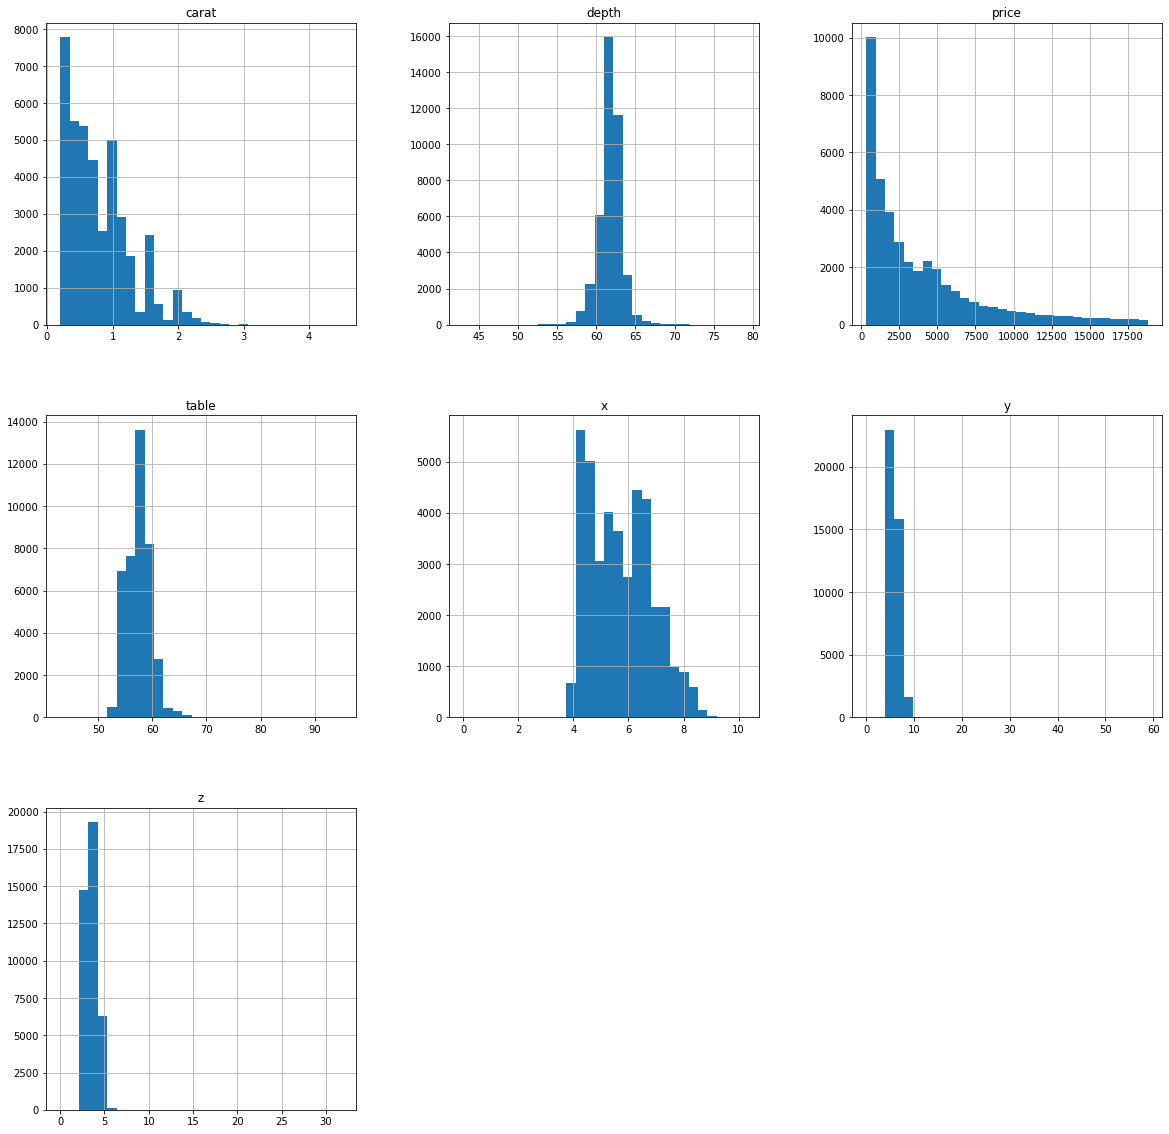

In [14]:
df_train.hist(figsize=[20,20], bins=30)

- Normal distributions: x, y z, depth, table
- Exponential distributions: carat, price

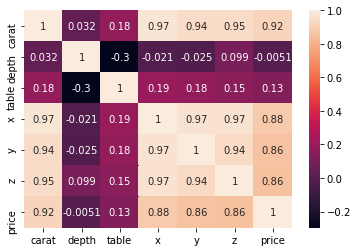

In [15]:
sns.heatmap(df_train.corr(), annot=True)

## Option 1: Transform the alphabetic values in numeric values

In [16]:
from src.cleaning import categoric_to_numeric

In [17]:
categoric_to_numeric(df_train)

In [42]:
df_train.head(5)

,carat,cut,color,clarity,depth,table,x,y,z,price
id,,,,,,,,,,
0,0.30,3,5,4,62.8,56.0,4.29,4.31,2.70,605
1,0.34,4,6,3,62.6,55.0,4.46,4.49,2.80,565
2,0.40,3,7,3,60.3,62.0,4.70,4.75,2.85,720
3,0.40,5,3,5,61.8,59.2,4.72,4.74,2.92,793
4,0.90,3,7,3,61.0,63.0,6.10,6.13,3.73,4381


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1C357E50>,
      dtype=object)

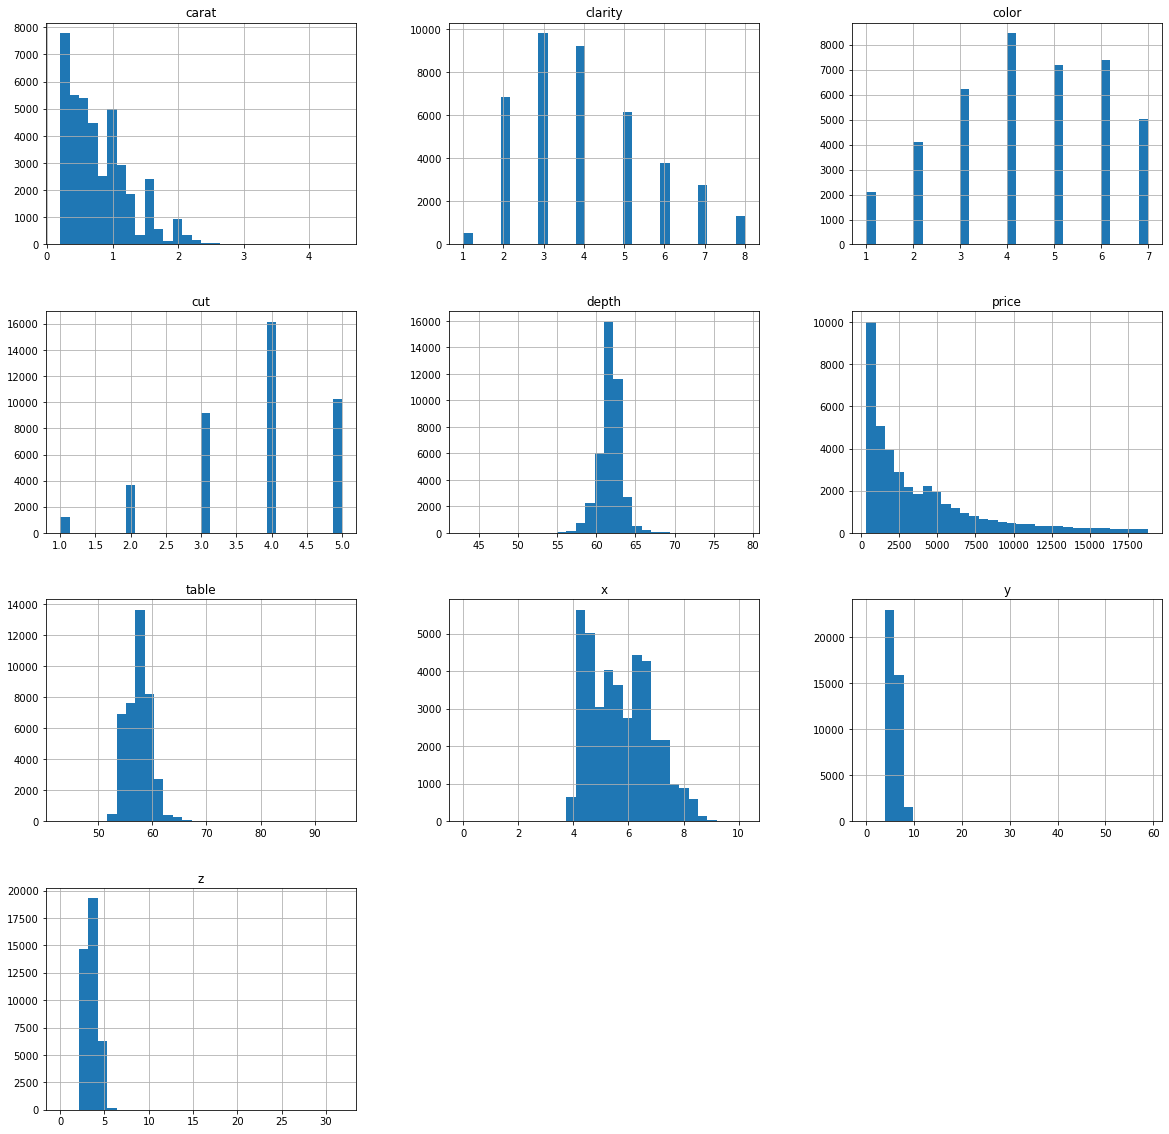

In [19]:
df_train.hist(figsize=[20,20], bins=30)

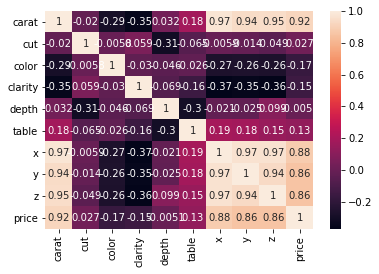

In [20]:
sns.heatmap(df_train.corr(), annot=True)

In [21]:
df_train.describe()

,carat,cut,color,clarity,depth,table,x,y,z,price
count,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000
mean,0.797150,3.758151,4.401706,4.055321,61.746612,57.453561,5.729391,5.733217,3.537644,3928.715264
std,0.472872,1.024129,1.698944,1.644900,1.431006,2.235668,1.121283,1.151076,0.709557,3985.070609
min,0.200000,1.000000,1.000000,1.000000,43.000000,43.000000,0.000000,0.000000,0.000000,326.000000
25%,0.400000,3.000000,3.000000,3.000000,61.000000,56.000000,4.710000,4.720000,2.910000,946.500000
50%,0.700000,4.000000,4.000000,4.000000,61.800000,57.000000,5.700000,5.710000,3.530000,2398.000000
75%,1.040000,5.000000,6.000000,5.000000,62.500000,59.000000,6.540000,6.540000,4.040000,5328.500000
max,4.500000,5.000000,7.000000,8.000000,79.000000,95.000000,10.230000,58.900000,31.800000,18818.000000


In [23]:
import matplotlib.pyplot as plt

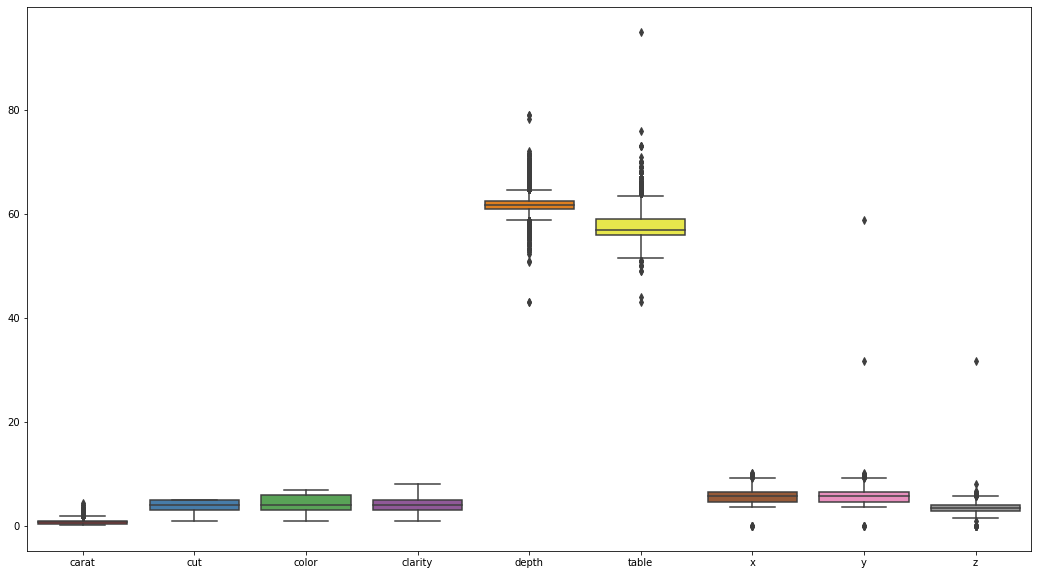

In [24]:
plt.figure(figsize=(18,10))
sns.boxplot(data=df_train.drop(columns=('price')), orient="v", palette="Set1",)

In [26]:
df_train.to_csv('./output/diamond_train_alpha_to_num.csv')

In [27]:
categoric_to_numeric(df_test)

In [28]:
df_test.to_csv('./output/diamond_test_alpha_to_num.csv')

## Option 2: Use get_dummies to obtain numeric values for the aforementioned columns

In [29]:
df_train_dummies = pd.get_dummies(train_copy)

In [30]:
df_train_dummies.head(5)

,carat,depth,table,x,y,z,price,cut_Fair,cut_Good,cut_Ideal,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
id,,,,,,,,,,,,,,,,,,,,,
0,0.30,62.8,56.0,4.29,4.31,2.70,605,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0.34,62.6,55.0,4.46,4.49,2.80,565,0,0,1,...,0,0,0,0,1,0,0,0,0,0
2,0.40,60.3,62.0,4.70,4.75,2.85,720,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0.40,61.8,59.2,4.72,4.74,2.92,793,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0.90,61.0,63.0,6.10,6.13,3.73,4381,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [31]:
df_test_dummies = pd.get_dummies(test_copy)

In [32]:
df_test_dummies.head(5)

,carat,depth,table,x,y,z,cut_Fair,cut_Good,cut_Ideal,cut_Premium,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
id,,,,,,,,,,,,,,,,,,,,,
0,2.36,60.8,54.0,8.68,8.57,5.24,0,0,1,0,...,1,0,0,0,0,1,0,0,0,0
1,2.04,62.0,56.0,8.18,8.23,5.09,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
2,0.51,61.7,54.0,5.18,5.19,3.20,0,0,1,0,...,1,0,0,0,1,0,0,0,0,0
3,0.30,61.3,56.0,4.32,4.33,2.65,0,0,1,0,...,1,0,0,0,1,0,0,0,0,0
4,0.96,68.8,56.0,6.11,5.98,4.16,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [34]:
df_train_dummies.to_csv('./output/diamond_train_dummies.csv')

In [35]:
df_test_dummies.to_csv('./output/diamond_test_dummies.csv')